In [11]:
#Libraries req
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Load the grayscale image
img_path = "test_img.png"
if not os.path.exists(img_path):
  raise FileNotFoundError(f"The image file '{img_path}' does not exist.")

img = cv2.imread(img_path)

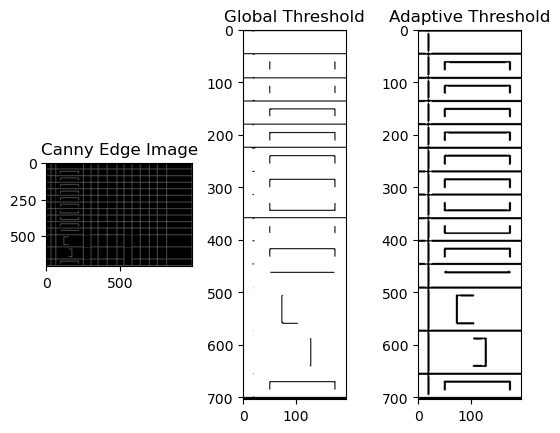

True

In [21]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
img_path = "test_img.png"
if not os.path.exists(img_path):
    raise FileNotFoundError(f"The image file '{img_path}' does not exist.")

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Constants for Canny edge detection
LOWER_CANNY_THRESHOLD = 80
UPPER_CANNY_THRESHOLD = 180

# Constants for edge counting
EDGE_COUNT_THRESHOLD = 25  # Minimum edges to consider a valid column
MIN_COLUMN_WIDTH = 40  # Minimum width for a valid column

# Function to find column boundaries based on edge counts
def find_column_boundaries(edge_count, threshold, min_width):
    column_boundaries = []
    inside_column = False

    for i in range(len(edge_count)):
        if edge_count[i] > threshold and not inside_column:
            column_boundaries.append(i)  # Start of a new column
            inside_column = True
        elif edge_count[i] <= threshold and inside_column:
            column_boundaries.append(i)  # End of the column
            inside_column = False

    valid_columns = []
    i = 0
    while i < len(column_boundaries) - 1:
        start = column_boundaries[i]
        end = column_boundaries[i + 1]
        if end - start >= min_width:
            valid_columns.append((start, end))
        i += 2

    return valid_columns

# Apply Canny edge detection
canny_image = cv2.Canny(img, LOWER_CANNY_THRESHOLD, UPPER_CANNY_THRESHOLD)

# Count edges in each column and find boundaries
edge_count = np.sum(canny_image == 255, axis=0)
valid_columns = find_column_boundaries(edge_count, EDGE_COUNT_THRESHOLD, MIN_COLUMN_WIDTH)

# Crop the original image based on valid columns
if valid_columns:
    # Get the start and end column indices
    start_col, end_col = max(valid_columns, key=lambda x: x[1] - x[0])

    # Adjust start_col and end_col to remove 10 pixels from each side
    start_col = min(start_col + 10, end_col - 10)  # Ensure it doesn't exceed other boundaries
    end_col = max(start_col + 10, min(end_col - 10, img.shape[1]))  # Avoid going out of image bounds

    cropped_image = img[:, start_col:end_col]

# Create binary images using global and adaptive thresholding
global_threshold = 150  # Example threshold value
_, binary_image_global = cv2.threshold(
    cropped_image, global_threshold, 255, cv2.THRESH_BINARY
)

adaptive_threshold_size = 11  # Size of the neighborhood for adaptive thresholding
adaptive_constant = 2  # Constant subtracted from the adaptive threshold
binary_image_adaptive = cv2.adaptiveThreshold(
    cropped_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, adaptive_threshold_size, adaptive_constant
)

# Visualize the results
plt.subplot(1, 3, 1)
plt.imshow(canny_image, cmap='gray')
plt.title("Canny Edge Image")

plt.subplot(1, 3, 2)
plt.imshow(binary_image_global, cmap='gray')
plt.title("Global Threshold")

plt.subplot(1, 3, 3)
plt.imshow(binary_image_adaptive, cmap='gray')
plt.title("Adaptive Threshold")

plt.show()

# Optional: Save the binary images if needed
cv2.imwrite("binary_image_global.jpg", binary_image_global)
cv2.imwrite("binary_image_adaptive.jpg", binary_image_adaptive)


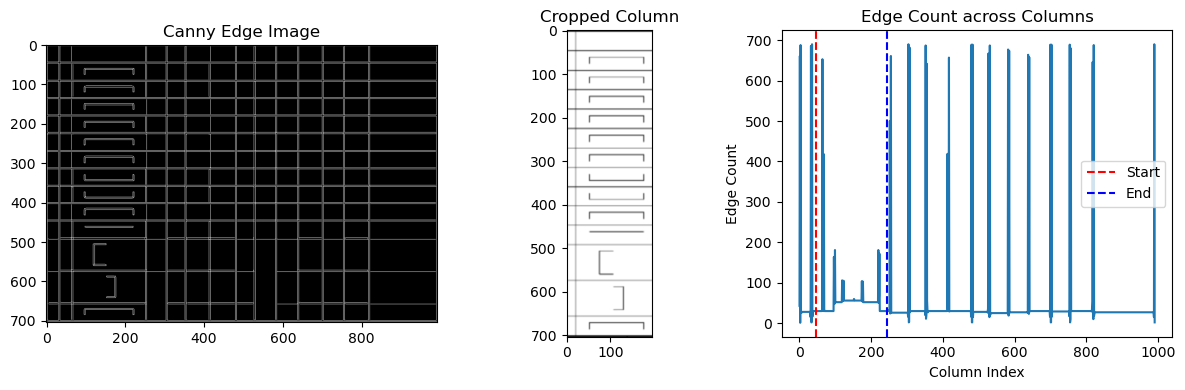

In [4]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
img_path = "test_img.png"
if not os.path.exists(img_path):
    raise FileNotFoundError(f"The image file '{img_path}' does not exist.")

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Constants for Canny edge detection
LOWER_CANNY_THRESHOLD = 100
UPPER_CANNY_THRESHOLD = 200

# Apply Canny edge detection
canny_image = cv2.Canny(img, LOWER_CANNY_THRESHOLD, UPPER_CANNY_THRESHOLD)

# Count edges in each column
edge_count = np.sum(canny_image == 255, axis=0)

# Constants for edge counting and valid column detection
EDGE_COUNT_THRESHOLD = 25  # Minimum edges to consider a valid column
MIN_COLUMN_WIDTH = 50  # Minimum width for a valid column

# Function to find valid column boundaries based on edge counts
def find_column_boundaries(edge_count, threshold, min_width):
    column_boundaries = []
    inside_column = False

    # Find the start and end of columns based on edge count
    for i in range(len(edge_count)):
        if edge_count[i] > threshold and not inside_column:
            column_boundaries.append(i)
            inside_column = True
        elif edge_count[i] <= threshold and inside_column:
            column_boundaries.append(i)
            inside_column = False

    # Find valid columns with a specified minimum width
    valid_columns = []
    i = 0
    while i < len(column_boundaries) - 1:
        start = column_boundaries[i]
        end = column_boundaries[i + 1]
        if end - start >= min_width:
            valid_columns.append((start, end))
        i += 2

    return valid_columns

# Find valid columns based on edge count
valid_columns = find_column_boundaries(edge_count, EDGE_COUNT_THRESHOLD, MIN_COLUMN_WIDTH)

# Alternative approach: Select the column with the maximum edge count
if valid_columns:
    # Calculate edge count for each valid column
    edge_counts_per_column = [np.sum(edge_count[start:end]) for start, end in valid_columns]

    # Find the index of the column with the maximum edge count
    max_edge_column_index = np.argmax(edge_counts_per_column)

    # Get the start and end indices for the column with the most edges
    start_col, end_col = valid_columns[max_edge_column_index]

    # Adjust start_col and end_col to remove 10 pixels from each side (avoid edge artifacts)
    start_col = max(0, start_col + 10)
    end_col = min(img.shape[1], end_col - 10)

    # Crop the original image based on the selected column
    cropped_image = img[:, start_col:end_col]

    # Visualize the cropped image and other results
    plt.figure(figsize=(12, 4))

    # Original Canny edge image
    plt.subplot(1, 3, 1)
    plt.imshow(canny_image, cmap='gray')
    plt.title("Canny Edge Image")

    # Cropped column image
    plt.subplot(1, 3, 2)
    plt.imshow(cropped_image, cmap='gray')
    plt.title("Cropped Column")

    # Edge count visualization across columns
    plt.subplot(1, 3, 3)
    plt.plot(edge_count)
    plt.axvline(x=start_col, color='red', linestyle='--', label="Start")
    plt.axvline(x=end_col, color='blue', linestyle='--', label="End")
    plt.title("Edge Count across Columns")
    plt.xlabel("Column Index")
    plt.ylabel("Edge Count")
    plt.legend()

    plt.tight_layout()
    plt.show()


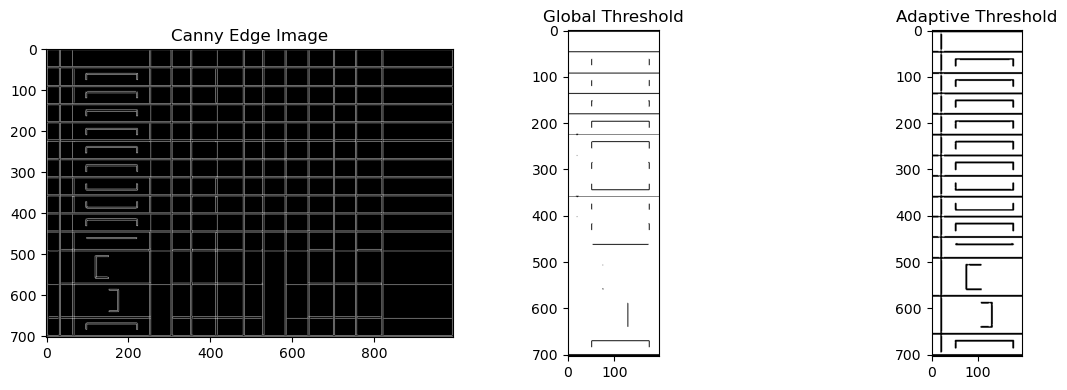

True

In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
img_path = "test_img.png"
if not os.path.exists(img_path):
    raise FileNotFoundError(f"The image file '{img_path}' does not exist.")

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Constants for Canny edge detection
LOWER_CANNY_THRESHOLD = 100
UPPER_CANNY_THRESHOLD = 200

# Apply Canny edge detection
canny_image = cv2.Canny(img, LOWER_CANNY_THRESHOLD, UPPER_CANNY_THRESHOLD)

# Find valid columns based on edge count
EDGE_COUNT_THRESHOLD = 25  # Minimum edges to consider a valid column
MIN_COLUMN_WIDTH = 50  # Minimum width for a valid column

def find_column_boundaries(edge_count, threshold, min_width):
    # Identify valid columns based on edge count
    column_boundaries = []
    inside_column = False

    for i in range(len(edge_count)):
        if edge_count[i] > threshold and not inside_column:
            column_boundaries.append(i)
            inside_column = True
        elif edge_count[i] <= threshold and inside_column:
            column_boundaries.append(i)
            inside_column = False

    # Find valid columns with a specified minimum width
    valid_columns = []
    i = 0
    while i < len(column_boundaries) - 1:
        start = column_boundaries[i]
        end = column_boundaries[i + 1]
        if end - start >= min_width:
            valid_columns.append((start, end))
        i += 2

    return valid_columns

edge_count = np.sum(canny_image == 255, axis=0)
valid_columns = find_column_boundaries(edge_count, EDGE_COUNT_THRESHOLD, MIN_COLUMN_WIDTH)

# Alternative approach: Select the column with the maximum edge count
if valid_columns:
    # Calculate edge count for each valid column
    edge_counts_per_column = [np.sum(edge_count[start:end]) for start, end in valid_columns]

    # Find the index of the column with the maximum edge count
    max_edge_column_index = np.argmax(edge_counts_per_column)

    # Get the start and end indices for the column with the most edges
    start_col, end_col = valid_columns[max_edge_column_index]

    # Adjust start_col and end_col to remove 10 pixels from each side
    start_col = max(0, start_col + 10)
    end_col = min(img.shape[1], end_col - 10)

    # Crop the original image based on the selected column
    cropped_image = img[:, start_col:end_col]

# Create binary images using global and adaptive thresholding
global_threshold = 127  # Example threshold value
_, binary_image_global = cv2.threshold(
    cropped_image, global_threshold, 255, cv2.THRESH_BINARY
)

adaptive_threshold_size = 11  # Size of the neighborhood for adaptive thresholding
adaptive_constant = 2  # Constant subtracted from the adaptive threshold
binary_image_adaptive = cv2.adaptiveThreshold(
    cropped_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, adaptive_threshold_size, adaptive_constant
)

# Visualize the results
plt.figure(figsize=(12, 4))

# Original Canny edge image
plt.subplot(1, 3, 1)
plt.imshow(canny_image, cmap='gray')
plt.title("Canny Edge Image")

# Cropped column image
plt.subplot(1, 3, 2)
plt.imshow(binary_image_global, cmap='gray')
plt.title("Global Threshold")

# Cropped column image with adaptive thresholding
plt.subplot(1, 3, 3)
plt.imshow(binary_image_adaptive, cmap='gray')
plt.title("Adaptive Threshold")

plt.tight_layout()
plt.show()

# Optional: Save the binary images if needed
cv2.imwrite("binary_image_global.jpg", binary_image_global)
cv2.imwrite("binary_image_adaptive.jpg", binary_image_adaptive)


Cropped 14 row images to the 'ShapesFinal' folder.


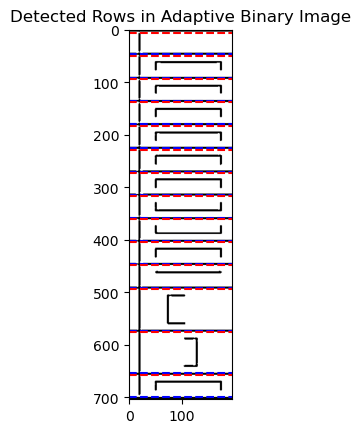

In [6]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to detect rows in a binary image based on edge count
def detect_rows(binary_img, row_threshold=35, min_row_width=5, max_row_width=150):
    row_sums = np.sum(binary_img, axis=1)
    in_row = False
    start = None
    rows = []

    for i, sum_value in enumerate(row_sums):
        if sum_value > row_threshold and not in_row:
            start = i
            in_row = True
        elif sum_value <= row_threshold and in_row:
            if start is not None:
                row_width = i - start
                if min_row_width <= row_width <= max_row_width:
                    rows.append((start, i))
            in_row = False

    # Handle edge case for a row ending at the last pixel
    if in_row and start is not None:
        row_width = len(row_sums) - start
        if min_row_width <= row_width <= max_row_width:
            rows.append((start, len(row_sums)))

    return rows

# Function to save cropped rows with a specified border width
def save_cropped_rows(binary_img, rows, output_folder, border_width=10):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for idx, (start, end) in enumerate(rows):
        # Crop the row from the binary image
        row_img = binary_img[start:end, :]

        # Add a border around the cropped row
        height, width = row_img.shape[:2]
        new_height = height + 2 * border_width

        # Create a black background with the desired dimensions
        border_img = np.zeros((new_height, width), dtype=np.uint8)

        # Place the cropped row image with a border
        border_img[border_width:height + border_width, :] = row_img

        # Create a filename for the row image
        row_path = os.path.join(output_folder, f"row_{idx + 1}.jpg")

        # Save the cropped row image with the border
        cv2.imwrite(row_path, border_img)

    print(f"Cropped {len(rows)} row images to the '{output_folder}' folder.")

# Example code to demonstrate the use of these functions
# Load the adaptive binary image (assuming this is the output from previous steps)
adaptive_binary_img = cv2.imread("binary_image_adaptive.jpg", cv2.IMREAD_GRAYSCALE)

# Detect rows in the adaptive binary image
detected_rows = detect_rows(adaptive_binary_img, row_threshold=35, min_row_width=5, max_row_width=150)

# Save the detected rows with a specified border to the "ShapesFinal" folder
save_cropped_rows(adaptive_binary_img, detected_rows, "ShapesFinal", border_width=10)

# Optional: Visualize the detected rows
plt.imshow(adaptive_binary_img, cmap='gray')
for (start, end) in detected_rows:
    plt.axhline(y=start, color='red', linestyle='--')  # Draw lines at row boundaries
    plt.axhline(y=end, color='blue', linestyle='--')

plt.title("Detected Rows in Adaptive Binary Image")
plt.show()


Saved cropped rows to the 'ShapesFinal1' folder.


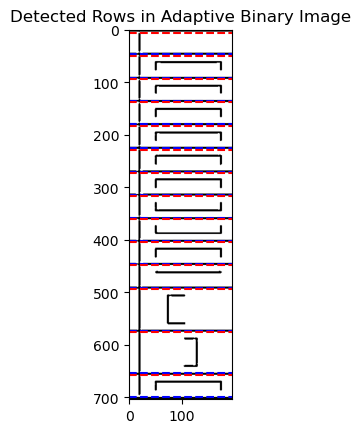

In [7]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to detect rows in a binary image based on edge count
def detect_rows(binary_img, row_threshold=35, min_row_width=5, max_row_width=150):
    row_sums = np.sum(binary_img, axis=1)
    in_row = False
    start = None
    rows = []

    for i, sum_value in enumerate(row_sums):
        if sum_value > row_threshold and not in_row:
            start = i
            in_row = True
        elif sum_value <= row_threshold and in_row:
            if start is not None:
                row_width = i - start
                if min_row_width <= row_width <= max_row_width:
                    rows.append((start, i))
            in_row = False

    # Handle edge case for a row ending at the last pixel
    if in_row and start is not None:
        row_width = len(row_sums) - start
        if min_row_width <= row_width <= max_row_width:
            rows.append((start, len(row_sums)))

    return rows

# Function to save cropped rows with a specified white border width
def save_cropped_rows(binary_img, rows, output_folder, border_width=10):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for idx, (start, end) in enumerate(rows):
        # Crop the row from the binary image
        row_img = binary_img[start:end, :]

        # Check if the cropped image is pure white (no shapes)
        if np.all(row_img == 255):
            print(f"Row {idx + 1} is entirely white, skipping.")
            continue

        # Add a white border around the cropped row
        height, width = row_img.shape[:2]
        new_height = height + 2 * border_width

        # Create a white background with the desired dimensions
        border_img = np.ones((new_height, width), dtype=np.uint8) * 255  # White background

        # Place the cropped row image with a white border
        border_img[border_width:height + border_width, :] = row_img

        # Create a filename for the row image
        row_path = os.path.join(output_folder, f"row_{idx + 1}.jpg")

        # Save the cropped row image with the border
        cv2.imwrite(row_path, border_img)

    print(f"Saved cropped rows to the '{output_folder}' folder.")

# Example code to demonstrate the use of these functions
# Load the adaptive binary image
adaptive_binary_img = cv2.imread("binary_image_adaptive.jpg", cv2.IMREAD_GRAYSCALE)

# Detect rows in the adaptive binary image
detected_rows = detect_rows(adaptive_binary_img, row_threshold=35, min_row_width=5, max_row_width=150)

# Save the detected rows with a specified white border to the "ShapesFinal" folder
save_cropped_rows(adaptive_binary_img, detected_rows, "ShapesFinal1", border_width=10)

# Optional: Visualize the detected rows for verification
plt.imshow(adaptive_binary_img, cmap='gray')
for (start, end) in detected_rows:
    plt.axhline(y=start, color='red', linestyle='--')  # Draw lines at row boundaries
    plt.axhline(y=end, color='blue', linestyle='--')

plt.title("Detected Rows in Adaptive Binary Image")
plt.show()


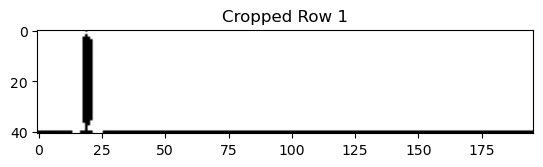

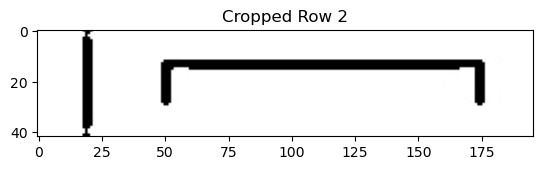

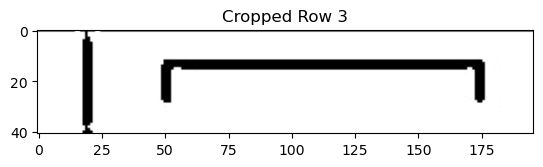

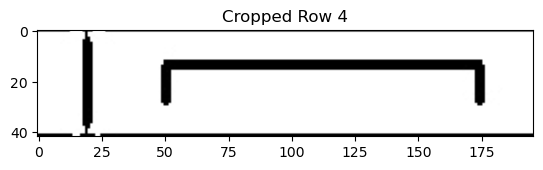

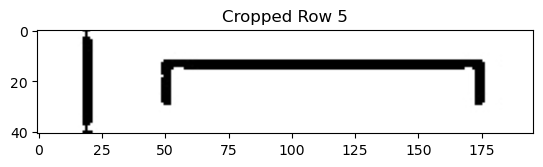

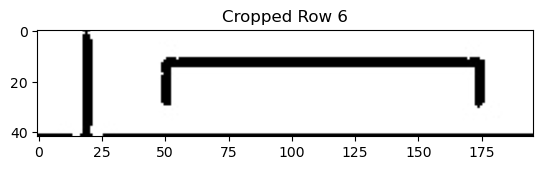

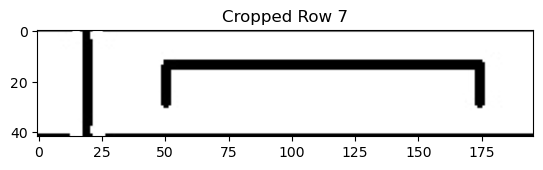

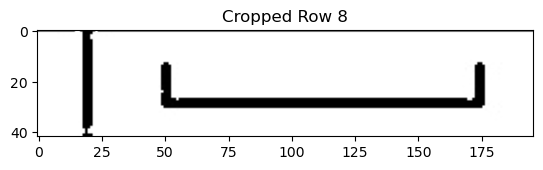

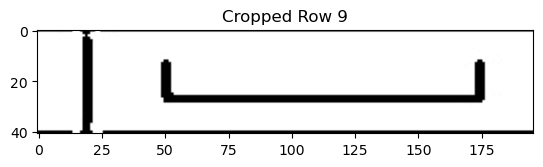

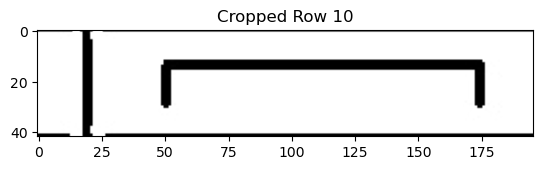

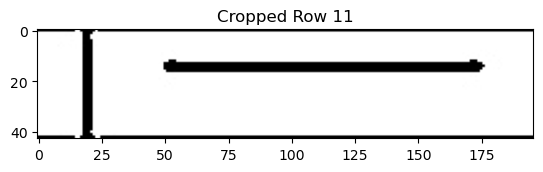

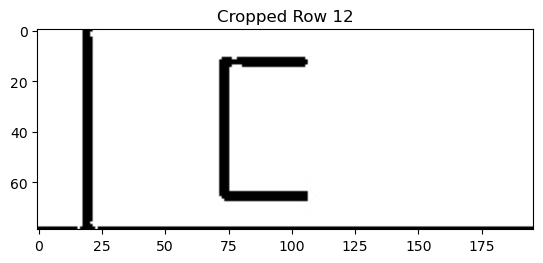

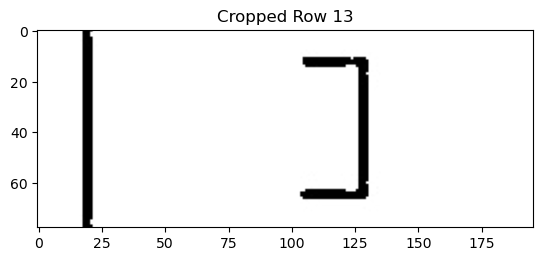

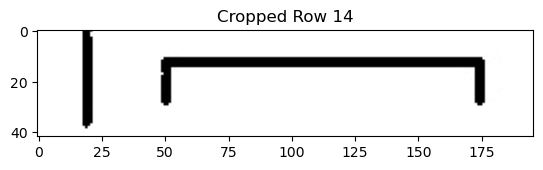

Finished saving cropped rows to the 'ShapesFinal4' folder.


In [8]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to detect rows in a binary image based on edge count
def detect_rows(binary_img, row_threshold=35, min_row_width=5, max_row_width=150):
    row_sums = np.sum(binary_img, axis=1)
    in_row = False
    start = None
    rows = []

    for i, sum_value in enumerate(row_sums):
        if sum_value > row_threshold and not in_row:
            start = i
            in_row = True
        elif sum_value <= row_threshold and in_row:
            if start is not None:
                row_width = i - start
                if min_row_width <= row_width <= max_row_width:
                    rows.append((start, i))
            in_row = False

    # Handle edge case for a row ending at the last pixel
    if in_row and start is not None:
        row_width = len(row_sums) - start
        if min_row_width <= row_width <= max_row_width:
            rows.append((start, len(row_sums)))

    return rows

# Function to check if an image is blank (all white or all black)
def is_image_blank(image, tolerance=5):
    # Check if the image is entirely white or black with a tolerance
    return (np.all(image >= 255 - tolerance) or np.all(image <= tolerance))

# Function to save cropped rows with a specified white border width
def save_cropped_rows(binary_img, rows, output_folder, border_width=10):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for idx, (start, end) in enumerate(rows):
        # Crop the row from the binary image
        row_img = binary_img[start:end, :]

        # Check if the cropped image is blank
        if is_image_blank(row_img):
            print(f"Row {idx + 1} is blank, skipping.")
            continue

        # Add a white border around the cropped row
        height, width = row_img.shape[:2]
        new_height = height + 2 * border_width

        # Create a white background with the desired dimensions
        border_img = np.ones((new_height, width), dtype=np.uint8) * 255  # White background

        # Place the cropped row image with a white border
        border_img[border_width:height + border_width, :] = row_img

        # Create a filename for the row image
        row_path = os.path.join(output_folder, f"row_{idx + 1}.jpg")

        # Save the cropped row image with the border
        cv2.imwrite(row_path, border_img)

    print(f"Finished saving cropped rows to the '{output_folder}' folder.")

# Load the adaptive binary image
adaptive_binary_img = cv2.imread("binary_image_adaptive.jpg", cv2.IMREAD_GRAYSCALE)

if adaptive_binary_img is None:
    raise FileNotFoundError("The adaptive binary image could not be read.")

# Detect rows in the adaptive binary image
detected_rows = detect_rows(adaptive_binary_img, row_threshold=35, min_row_width=5, max_row_width=150)

# Visualize cropped rows before border addition to check for blanks
for idx, (start, end) in enumerate(detected_rows):
    row_img = adaptive_binary_img[start:end, :]

    plt.figure()
    plt.imshow(row_img, cmap='gray')
    plt.title(f"Cropped Row {idx + 1}")

    if is_image_blank(row_img):
        print(f"Cropped Row {idx + 1} is blank before adding border.")
    else:
        plt.show()

# Save the detected rows with a specified white border to the "ShapesFinal4" folder
save_cropped_rows(adaptive_binary_img, detected_rows, "ShapesFinal4", border_width=10)


Image: row_1.jpg, Number of corners detected: 5


C:\Users\KIIT\AppData\Local\Temp\ipykernel_27364\1783336894.py:57: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)  # Convert to integer coordinates


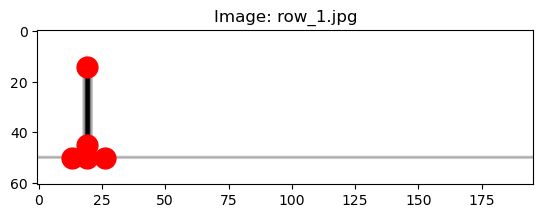

Image: row_10.jpg, Number of corners detected: 11


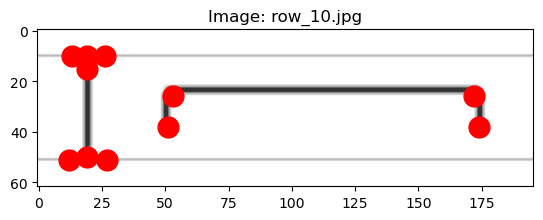

Image: row_11.jpg, Number of corners detected: 8


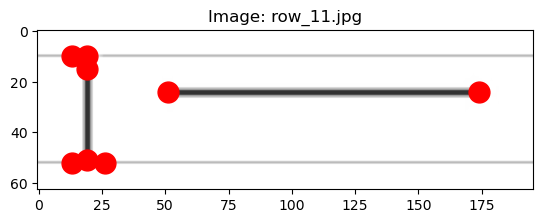

Image: row_12.jpg, Number of corners detected: 7


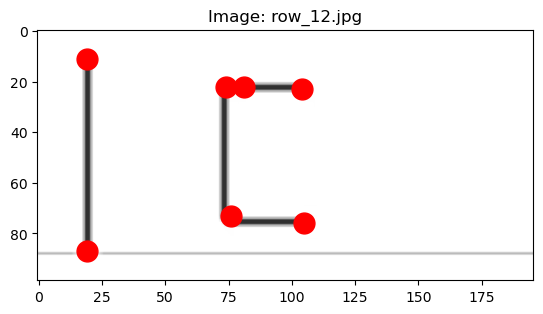

Image: row_13.jpg, Number of corners detected: 10


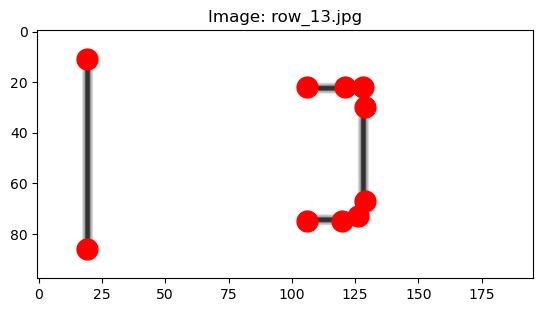

Image: row_14.jpg, Number of corners detected: 7


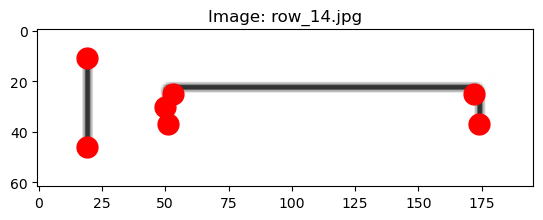

Image: row_2.jpg, Number of corners detected: 8


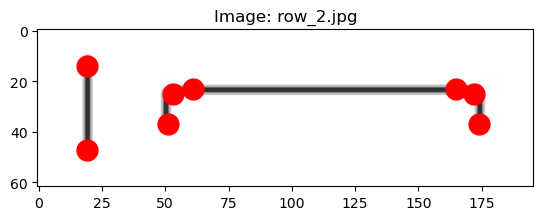

Image: row_3.jpg, Number of corners detected: 10


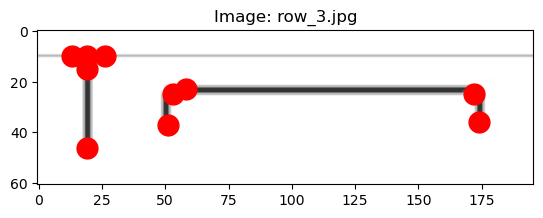

Image: row_4.jpg, Number of corners detected: 12


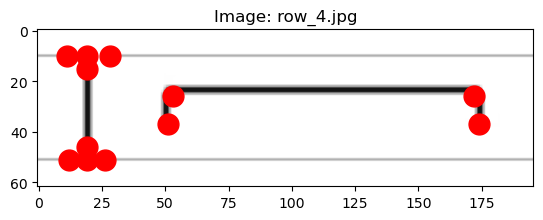

Image: row_5.jpg, Number of corners detected: 9


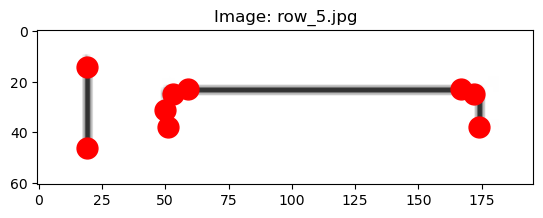

Image: row_6.jpg, Number of corners detected: 12


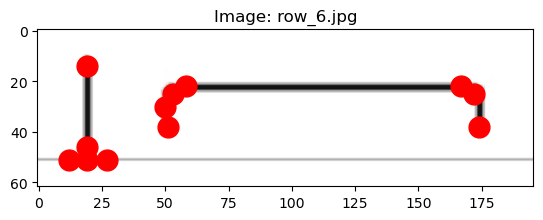

Image: row_7.jpg, Number of corners detected: 11


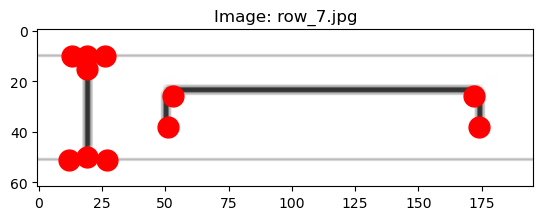

Image: row_8.jpg, Number of corners detected: 10


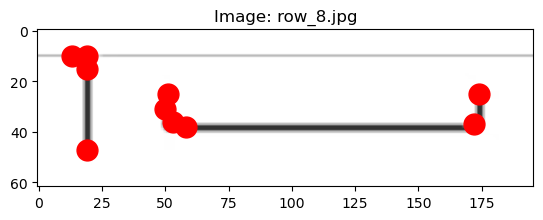

Image: row_9.jpg, Number of corners detected: 11


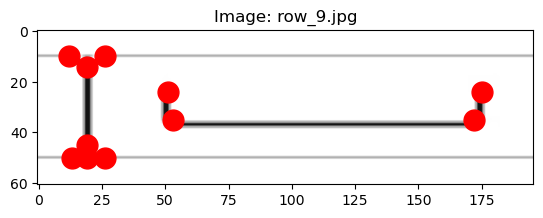

In [9]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Folder path containing the cropped images
image_folder = "ShapesFinal1"

# Gaussian blur parameters
gaussian_ksize = (3, 3)
gaussian_sigma = 0  # Default sigma value for Gaussian blur

# Dilation kernel and iterations
dilation_kernel = np.ones((3, 3), np.uint8)
dilation_iterations = 2  # Number of dilation iterations

# Check if the folder exists
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Folder '{image_folder}' does not exist.")

# Get all valid image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

# If no image files found, exit early
if not image_files:
    print("No valid image files found in the folder.")
else:
    # Loop through all image files in the folder
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)

        try:
            # Read the image in grayscale
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if image is None:
                print(f"Failed to read image: {image_file}")
                continue

            # Apply Gaussian blur for noise reduction
            blurred_img = cv2.GaussianBlur(image, gaussian_ksize, gaussian_sigma)

            # Apply dilation to enhance edges
            dilated_img = cv2.dilate(blurred_img, dilation_kernel, dilation_iterations)

            # Shi-Tomasi corner detection
            corners = cv2.goodFeaturesToTrack(
                dilated_img, maxCorners=300, qualityLevel=0.01, minDistance=5
            )

            # Visualize the image and corners
            plt.figure()
            plt.imshow(dilated_img, cmap='gray')
            plt.title(f"Image: {image_file}")

            if corners is not None:
                corners = np.int0(corners)  # Convert to integer coordinates

                # Plot the corners on the image
                for corner in corners:
                    x, y = corner.ravel()  # Get x and y coordinates
                    plt.plot(x, y, 'ro', ms=15)  # Red dots for corners

                # Print the number of corners detected
                num_corners = len(corners)
                print(f"Image: {image_file}, Number of corners detected: {num_corners}")
            else:
                print(f"Image: {image_file}, No corners detected")

            # Show the plot
            plt.show()

        except Exception as e:
            print(f"An error occurred while processing '{image_file}': {e}")


In [10]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Folder path containing the cropped images
image_folder = "ShapesFinal1"

# Excel output file path
excel_output = "corner_detection_results.xlsx"

# Create an empty list to hold the data for the Excel sheet
data = []

# Gaussian blur parameters
gaussian_ksize = (3, 3)
gaussian_sigma = 0  # Default sigma value for Gaussian blur

# Dilation kernel and iterations
dilation_kernel = np.ones((3, 3), np.uint8)
dilation_iterations = 2  # Number of dilation iterations

# Check if the folder exists
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Folder '{image_folder}' does not exist.")

# Get all valid image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

# If no image files found, exit early
if not image_files:
    print("No valid image files found in the folder.")

# Loop through all image files in the folder
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)

    try:
        # Read the image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Failed to read image: {image_file}")
            continue

        # Apply Gaussian blur for noise reduction
        blurred_img = cv2.GaussianBlur(image, gaussian_ksize, gaussian_sigma)

        # Apply dilation to enhance edges
        dilated_img = cv2.dilate(blurred_img, dilation_kernel, dilation_iterations)

        # Shi-Tomasi corner detection
        corners = cv2.goodFeaturesToTrack(
            dilated_img, maxCorners=300, qualityLevel=0.01, minDistance=5
        )

        # Determine the number of corners
        if corners is not None:
            num_corners = len(corners)
            num_bends = max(0, num_corners - 2)  # Avoid negative values

            # Add the data to the list
            data.append({
                'Image Name': image_file,
                'Number of Corners': num_corners,
                'Number of Bends': num_bends
            })

        else:
            # No corners detected, set 0 bends
            data.append({
                'Image Name': image_file,
                'Number of Corners': 0,
                'Number of Bends': 0
            })

    except Exception as e:
        print(f"An error occurred while processing '{image_file}': {e}")

# Create a DataFrame from the data list
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel(excel_output, index=False)

print(f"Results saved to '{excel_output}'")

Results saved to 'corner_detection_results.xlsx'
